In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Question 1
# Suppose the data for analysis includes the attribute age. The age values for the
# data tuples are (in increasing order)
ages = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 23, 25, 25, 25, 30, 33,
33, 33, 33, 35, 35, 36, 40, 45, 46, 52, 70]

In [4]:
#a
agesMean = np.mean(ages)
print(agesMean)
#The mean of the ages is 29.74

29.74074074074074


In [5]:
#b
agesMode = pd.Series(ages).mode()
print(agesMode)
#The mode of the ages is 33. This data set is unimodal because there is only one mode.

0    33
dtype: int64


In [6]:
#c
agesFirstHalf = ages[:13]
agesQ1 = np.median(agesFirstHalf)
print(agesQ1)
agesSecondHalf = ages[12:]
agesQ3 = np.median(agesSecondHalf)
print(agesQ3)
#The first quartile is 20, and the third quartile is 35.

20.0
35.0


In [7]:
#d
agesMedian = np.median(ages)
print(agesMedian)
#The minimum is 13, the first quartile is 20, the median is 25, the third quartile is 35, and the maximum is 70.

25.0


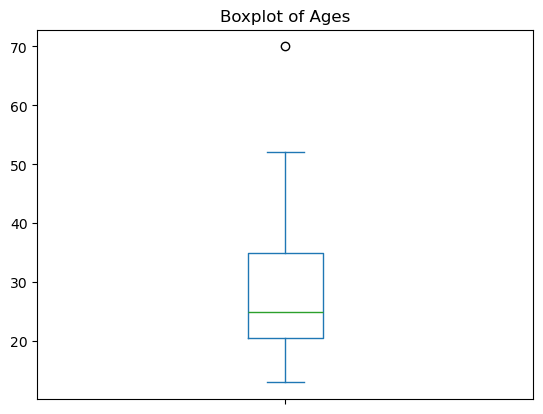

In [8]:
#e
pd.Series(ages).plot(kind="box", title="Boxplot of Ages")
plt.show()


In [9]:
# Question 2
Hitters = pd.read_csv('../data/Hitters.csv')
Hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [10]:
#a
rows, cols = Hitters.shape
print(f"Rows: {rows}")
print(f"Columns: {cols}")
#There are 322 rows and 20 columns in the Hitters data set.

Rows: 322
Columns: 20


In [11]:
#b
#This data set is from 1986 and 1987. HmRun is the number of home runs hit in 1986, while CHmRun is the number of homeruns hit in the player's career.


In [12]:
#c
for col in Hitters.columns:
    try:
        med = np.median(Hitters[col])
        print(f"Median of {col}: {med}")
    except:
        break

Median of AtBat: 379.5
Median of Hits: 96.0
Median of HmRun: 8.0
Median of Runs: 48.0
Median of RBI: 44.0
Median of Walks: 35.0
Median of Years: 6.0
Median of CAtBat: 1928.0
Median of CHits: 508.0
Median of CHmRun: 37.5
Median of CRuns: 247.0
Median of CRBI: 220.5
Median of CWalks: 170.5


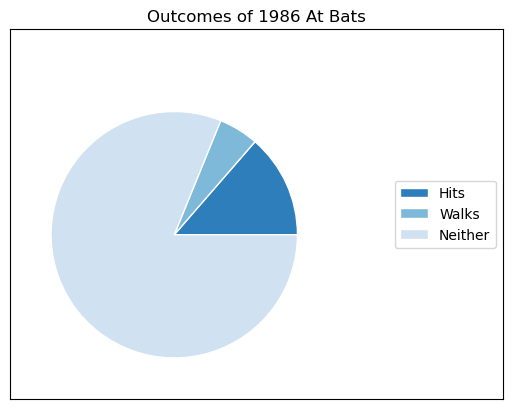

In [13]:
#d
totalAtBats = Hitters["AtBat"].sum()
totalHits = Hitters["Hits"].sum()
totalWalks = Hitters["Walks"].sum()
totalNeither = totalAtBats - totalHits - totalWalks
results = ["Hits", "Walks", "Neither"]
percentHits = totalHits/totalAtBats * 100
percentWalks = totalWalks/totalAtBats * 100
percentNeither = totalAtBats/totalNeither * 100
percents = [percentHits, percentWalks, percentNeither]
# Define a range of colors
colors = plt.get_cmap('Blues')(np.linspace(0.7, 0.2, len(percents)))

# Create a figure and axes
fig, ax = plt.subplots()

# Create the pie chart
ax.pie(percents, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

# Include a legend
ax.legend(results, loc="right")

# Adjust the axes
ax.set(xlim=(0, 12), xticks=np.arange(1, 8),
       ylim=(0, 9), yticks=np.arange(1, 8))
ax.tick_params(left = False, labelleft = False, 
               bottom = False, labelbottom = False)
ax.set(title="Outcomes of 1986 At Bats")

plt.show()

In [14]:
#e
salaryCol = Hitters['Salary']
sumMissing = salaryCol.isna().sum()
print(f"{sumMissing} are missing Salary information")
#59 rows are missing Salary information. The players who are missing salary information might not have been playing for a major league team by opening day in 1987.


59 are missing Salary information


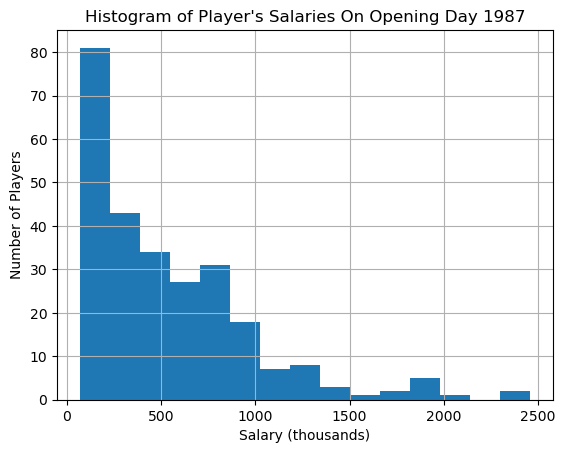

In [15]:
#f
salaryCol.dropna().hist(bins = 15)
plt.xlabel("Salary (thousands)")
plt.ylabel("Number of Players")
plt.title("Histogram of Player's Salaries On Opening Day 1987")

plt.show()

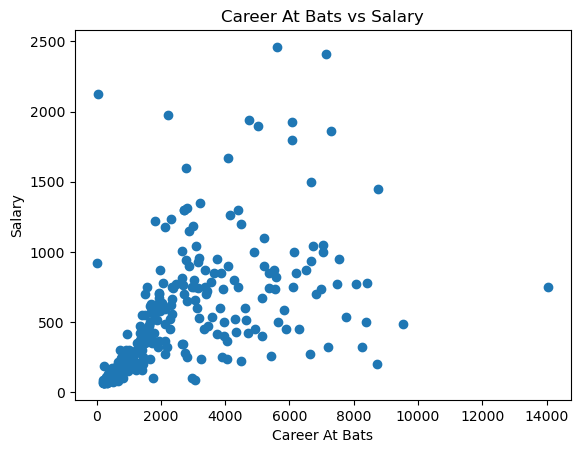

In [16]:
#g
#Scatter Plot of Salary and Career At Bats
plt.scatter(Hitters['CAtBat'], salaryCol)
plt.xlabel("Career At Bats")
plt.ylabel("Salary")
plt.title("Career At Bats vs Salary")
plt.show()

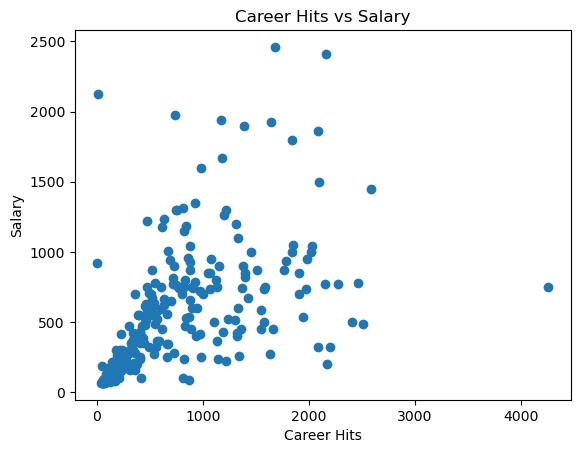

In [17]:
#Scatter Plot of Salary and Career Hits
plt.scatter(Hitters['CHits'], salaryCol)
plt.xlabel("Career Hits")
plt.ylabel("Salary")
plt.title("Career Hits vs Salary")
plt.show()

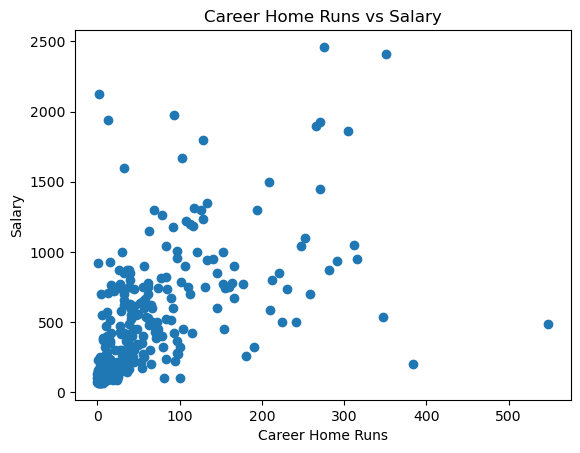

In [18]:
#Scatter Plot of Salary and Career Home Runs
plt.scatter(Hitters['CHmRun'], salaryCol)
plt.xlabel("Career Home Runs")
plt.ylabel("Salary")
plt.title("Career Home Runs vs Salary")
plt.show()

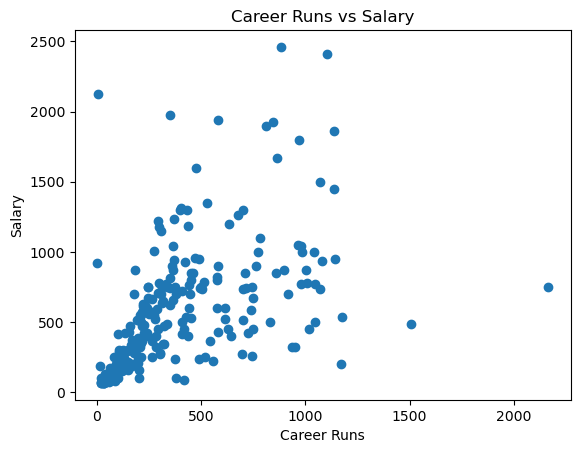

In [19]:
#Scatter Plot of Salary and Career Runs
plt.scatter(Hitters['CRuns'], salaryCol)
plt.xlabel("Career Runs")
plt.ylabel("Salary")
plt.title("Career Runs vs Salary")
plt.show()

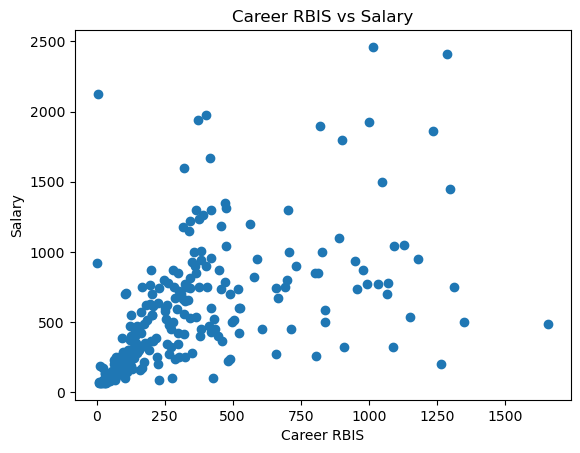

In [20]:
#Scatter Plot of Salary and Career RBIS
plt.scatter(Hitters['CRBI'], salaryCol)
plt.xlabel("Career RBIS")
plt.ylabel("Salary")
plt.title("Career RBIS vs Salary")
plt.show()

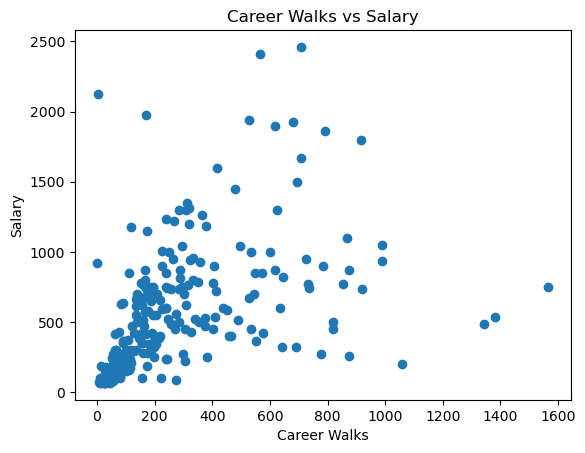

In [21]:
#Scatter Plot of Salary and Career Walks
plt.scatter(Hitters['CWalks'], salaryCol)
plt.xlabel("Career Walks")
plt.ylabel("Salary")
plt.title("Career Walks vs Salary")
plt.show()

In [22]:
#h
easternDivision = Hitters[Hitters['Division'] == "E"]
easternSalaryMean = np.mean(easternDivision["Salary"])
print(f"The Eastern Divison mean salary is {easternSalaryMean}")
westernDivision = Hitters[Hitters['Division'] == "W"]
westernSalaryMean = np.mean(westernDivision["Salary"])
print(f"The Western Divison mean salary is {westernSalaryMean}")
easternSalarySum = easternDivision['Salary'].sum()
westernSalarySum = westernDivision['Salary'].sum()
salaryDiff = easternSalarySum - westernSalarySum
print(f"The Eastern Division spends {round(salaryDiff, 2)} thousand more dollars than the Western Division.")

The Eastern Divison mean salary is 624.2713643410852
The Western Divison mean salary is 450.8768731343284
The Eastern Division spends 20113.5 thousand more dollars than the Western Division.


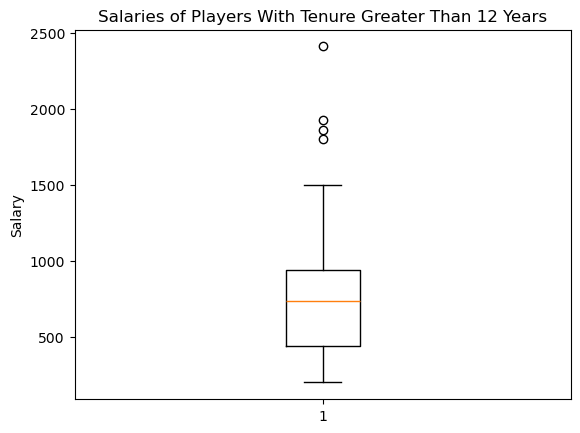

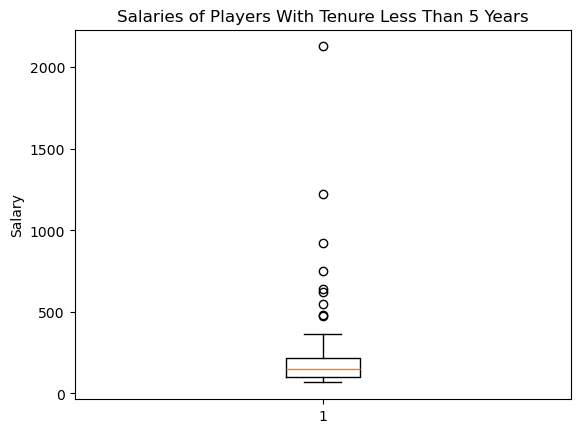

I can conclude that players who play longer in the MLB tend to have larger salaries than players who have been playing for a relatively short amount of time.


In [23]:
#i
moreTwelveYrs = Hitters[(Hitters['Years'] > 12) & (Hitters['Salary'].notna())]
lessFiveYrs = Hitters[(Hitters['Years'] < 5) & (Hitters['Salary'].notna())]
plt.boxplot(moreTwelveYrs['Salary'])
plt.title("Salaries of Players With Tenure Greater Than 12 Years")
plt.ylabel("Salary")
plt.show()
plt.boxplot(lessFiveYrs['Salary'])
plt.title("Salaries of Players With Tenure Less Than 5 Years")
plt.ylabel("Salary")
plt.show()
print("I can conclude that players who play longer in the MLB tend to have larger salaries than players who have been playing for a relatively short amount of time.")

In [24]:
#j
HittersCopy = Hitters.copy()
HittersCopy['CBA'] = HittersCopy['CHits'] / HittersCopy['CAtBat']
highestBA = HittersCopy.loc[HittersCopy['CBA'].idxmax()]
print(highestBA)
print("The player who has the highest batting average is in the American League East, has a salary of 1.6 million, and has a career batting average of 0.352.")


AtBat             580
Hits              207
HmRun               8
Runs              107
RBI                71
Walks             105
Years               5
CAtBat           2778
CHits             978
CHmRun             32
CRuns             474
CRBI              322
CWalks            417
League              A
Division            E
PutOuts           121
Assists           267
Errors             19
Salary         1600.0
NewLeague           A
CBA          0.352052
Name: 313, dtype: object
The player who has the highest batting average is in the American League East, has a salary of 1.6 million, and has a career batting average of 0.352.


In [25]:
#k
top5BA = HittersCopy.nlargest(5, 'CBA')
top5BA

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,CBA
313,580,207,8,107,71,105,5,2778,978,32,...,322,417,A,E,121,267,19,1600.0,A,0.352052
82,677,238,31,117,113,53,5,2223,737,93,...,401,171,A,E,1377,100,6,1975.0,A,0.331534
290,642,211,14,107,59,52,5,2364,770,27,...,230,193,N,W,337,19,4,740.0,N,0.325719
176,181,58,6,34,23,22,1,181,58,6,...,23,22,N,W,88,0,3,86.5,N,0.320442
52,19,7,0,1,2,1,4,41,13,1,...,4,4,A,E,0,0,0,NaN,A,0.317073


In [26]:
#The top three players with highest batting averages all have similar stats such as Career At Bats, Career Hits, Career Home Runs, Career RBIS. For these 3 players, they have Career At Bats in the 2000s. The number 4 and 5 player with highest batting averages have significantly less Career At Bats with 181 and 41 respectively. Their other stats (Career Hits, Home Runs, RBIS) are also significantly less than the first 3.

In [27]:
# Question 3
#a 
print("flexible model is better")

flexible model is better


In [28]:
#b
print("inflexible is better")

inflexible is better


In [29]:
#c
print("")

In [30]:
#d
print("")

In [ ]:
# Question 4
#a 
print("This scenario is a regression problem, and we are most interested in inference. The number of observations n = 600, and the number of features is p = 4.")

In [ ]:
#b
print("")